## Mayank Singh
#### 19, Nov, 2022
# HP Election - 2022

###  Agenda - Understanding and Performing Univariate Analysis

##### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable. In other words, independent analysis of each column/variable/feature is known Univariate Analysis.

## Importing Liabraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Generally before starting EDA, we should ask 7 basic questions about the data set and try to clean, transform the dataset as required.
We are doing the same in below steps before starting EDA.

In [2]:
## Ignoring the encoding errors in my case, using "encoding_erros = 'ignore' parameter"
df = pd.read_csv('Himachal_Pradesh_Political_party_candidates.csv', encoding_errors='ignore')

In [3]:
df.head(2)

,Sno,Candidate,Constituency,Party,Criminal Case,Education,Total Assets,Liabilities
0,1,Abhay Kumar Ashok,DHARAMSHALA,IND,0,Post Graduate,"Rs97,40,093\r\n~ 97Lacs+",Rs0\r\n~
1,2,Abhinay Bhardwaj,HAMIRPUR,Rashtriya Devbhumi Party,0,Graduate,"Rs5,42,477\r\n~ 5Lacs+","Rs2,50,000\r\n~ 2Lacs+"


In [4]:
# Converting two major columns of Data set from String/object to int
# 1. Total assests value
# 2. Liabilities value

In [5]:
# .str.replace() is used to remove unwanted characters from the coulmn values so that we get left only with digits to covert 
# the object to int
df['Total Assets'] = df['Total Assets'].str.replace('Rs',"")
df['Total Assets'] = df['Total Assets'].str.replace('\r\n~',"")
df['Total Assets'] = df['Total Assets'].str.replace(',',"")
df['Total Assets']= df['Total Assets'].str.split().str[0]
df['Total Assets'] = df['Total Assets'].str.strip()
df['Total Assets'] = df['Total Assets'].astype(int) # converting object to int

In [6]:
# .str.replace() is used to remove unwanted characters from the coulmn values so that we get left only with digits to covert 
# the object to int
df['Liabilities'] = df['Liabilities'].str.replace('Rs',"")
df['Liabilities'] = df['Liabilities'].str.replace('\r\n~',"")
df['Liabilities'] = df['Liabilities'].str.replace(',',"")
df['Liabilities']= df['Liabilities'].str.split().str[0]
df['Liabilities'] = df['Liabilities'].str.strip()
df['Liabilities'] = df['Liabilities'].astype(int) # converting object to int

In [7]:
df.drop('Sno', axis = 1,inplace = True)

In [8]:
df.isnull().sum()

Candidate        0
Constituency     0
Party            0
Criminal Case    0
Education        0
Total Assets     0
Liabilities      0
dtype: int64

In [9]:
df.sample(5)

,Candidate,Constituency,Party,Criminal Case,Education,Total Assets,Liabilities
261,Rajesh Dharmani,GHUMARWIN,INC,1,Post Graduate,13294907,365614
303,Ravi Kumar Mehta,SHIMLA RURAL,BJP,1,Post Graduate,23087042,2310662
96,Dr.Ram Lal Markanda,LAHAUL AND SPITI (ST),BJP,0,Doctorate,13929621,2000000
144,K. L. Thakur,NALAGARH,IND,0,Graduate Professional,25275022,13754673
67,Chander Mohan,UNA,IND,0,Graduate,6959604,0


In [10]:
df.info() # finally we can see our required columns in INT type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Candidate      412 non-null    object
 1   Constituency   412 non-null    object
 2   Party          412 non-null    object
 3   Criminal Case  412 non-null    int64 
 4   Education      412 non-null    object
 5   Total Assets   412 non-null    int32 
 6   Liabilities    412 non-null    int32 
dtypes: int32(2), int64(1), object(4)
memory usage: 19.4+ KB


### Identifying Nature of columns to perform EDA:
There are 2 types of columns avaailable in our data set:
1. Numerical Columns
2. Categorical Columns

which type of EDA method to be used depends on the nature of coulmn

# Starting EDA
### 1 . Categorical Columns
To analyse the categoriacal columns, below given two kinds of plots are most accurate:
1. Count plot - Gives a frequency count category wise
2. Pie chart - To get the insights in %age, use pie charts

### a. countplot

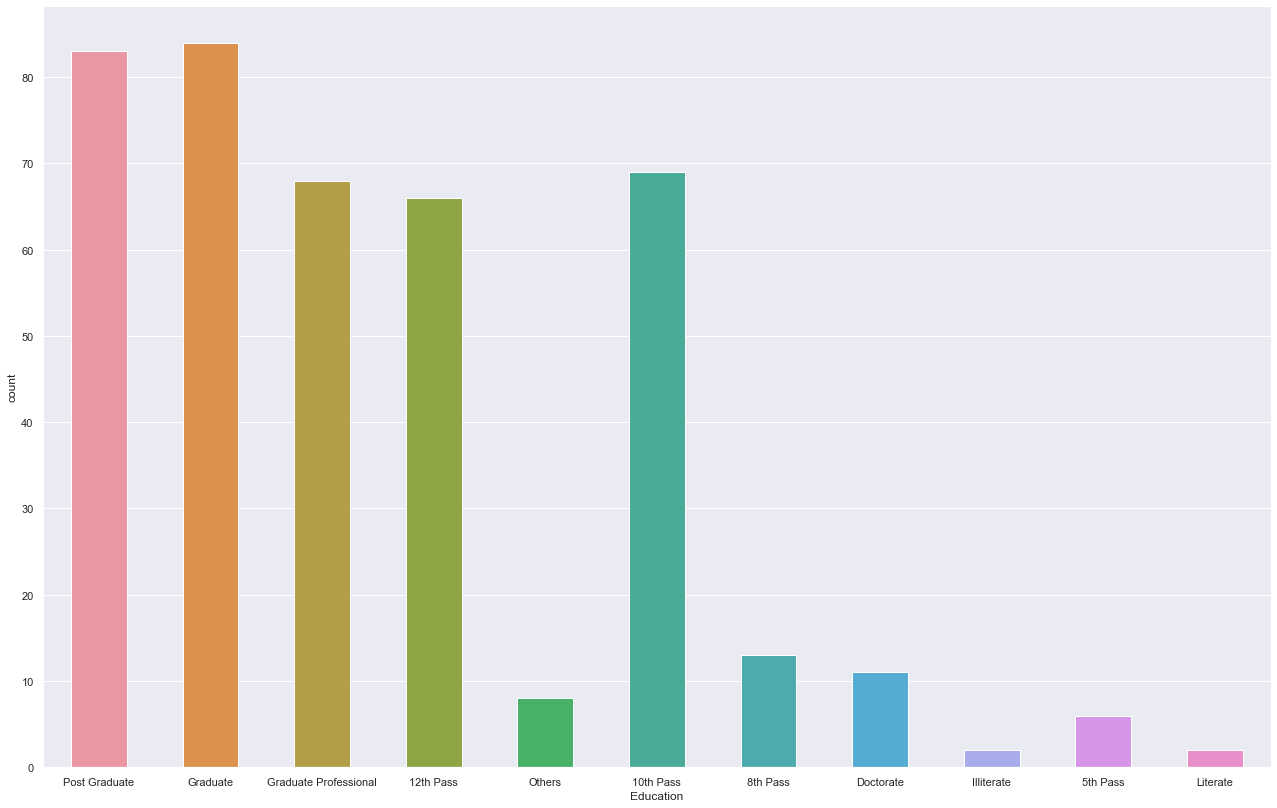

In [24]:
sns.countplot(data = df, x = 'Education', width=.5)
sns.set(rc={"figure.figsize":(12, 4)}) #width=12, #height=4

#### What insights we can draw ----
1. The highest qualification of candidates is Doctrate
2. Highest no. of people are Graduate, and very negligible are Illetrate.
3. 12th pass candidates are less than 10th pass.
4. There are candiadates who are even below 5th Pass - 'Literate'.

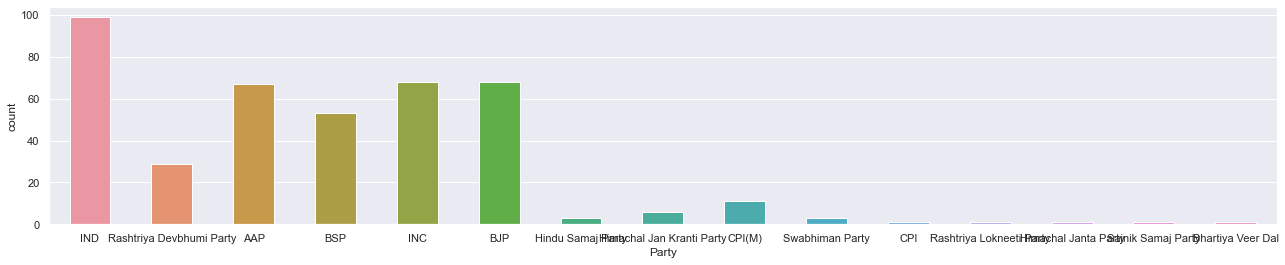

In [27]:
sns.countplot(data = df, x = 'Party', width=.5)
sns.set(rc={"figure.figsize":(22, 14)}) #width=22, #height=14

#### What insights we can draw ---
1. The highest number of candidates are of IND party.
2. Candidates of INC and BJP are equal.
3. Which all parties are partcipating in election.

In [13]:
df['Criminal Case'].value_counts()

0     318
1      59
2      12
3      10
4       3
5       3
11      2
9       1
8       1
20      1
19      1
30      1
Name: Criminal Case, dtype: int64

### b. Pie chart

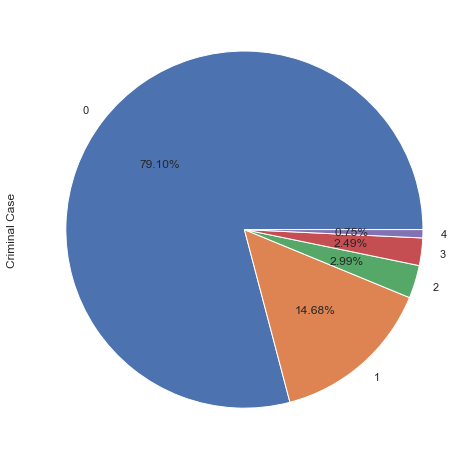

In [14]:
df['Criminal Case'].value_counts()[0:5].plot(kind = 'pie',autopct = '%.2f%%')
# To change the size of your pie chart/figure
fig = plt.gcf()
fig.set_size_inches(8,16)

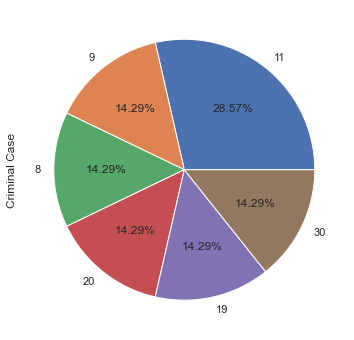

In [15]:
df['Criminal Case'].value_counts()[6:].plot(kind = 'pie',autopct = '%.2f%%')
# To change the size of your pie chart/figure
fig = plt.gcf()
fig.set_size_inches(12,6)

#### The above three codes of analysis helping us to gather info about the Criminal cases of candidates
1. What are the number of criminal cases and how many candidates fall into which category, and that too percenatge wise 

### 2. Numerical Columns

### a. Histogram

Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

In [16]:
df.groupby(['Party']).sum()

,Criminal Case,Total Assets,Liabilities
Party,,,
AAP,31,2.487807e+09,472854726.0
BJP,25,4.965818e+09,253437883.0
BSP,2,4.561986e+08,23083506.0
Bhartiya Veer Dal,5,7.828000e+05,96000.0
CPI,0,7.126000e+06,1375000.0
CPI(M),67,4.496489e+08,13696393.0
Himachal Jan Kranti Party,1,1.610552e+07,457000.0
Himachal Janta Party,0,2.335426e+06,400000.0
Hindu Samaj Party,0,1.516740e+06,36000.0


In [17]:
# Sometimes in a dataset having large distributions, ploting histograms directly is not a good choice/approach.
# Therefore we have first calculated some aggregate figures using pd.groupby function and then plotted the histogram.
# to verify and read the histogram accurately we have printed the output of groupby function as well.

<AxesSubplot:xlabel='Criminal Case', ylabel='Count'>

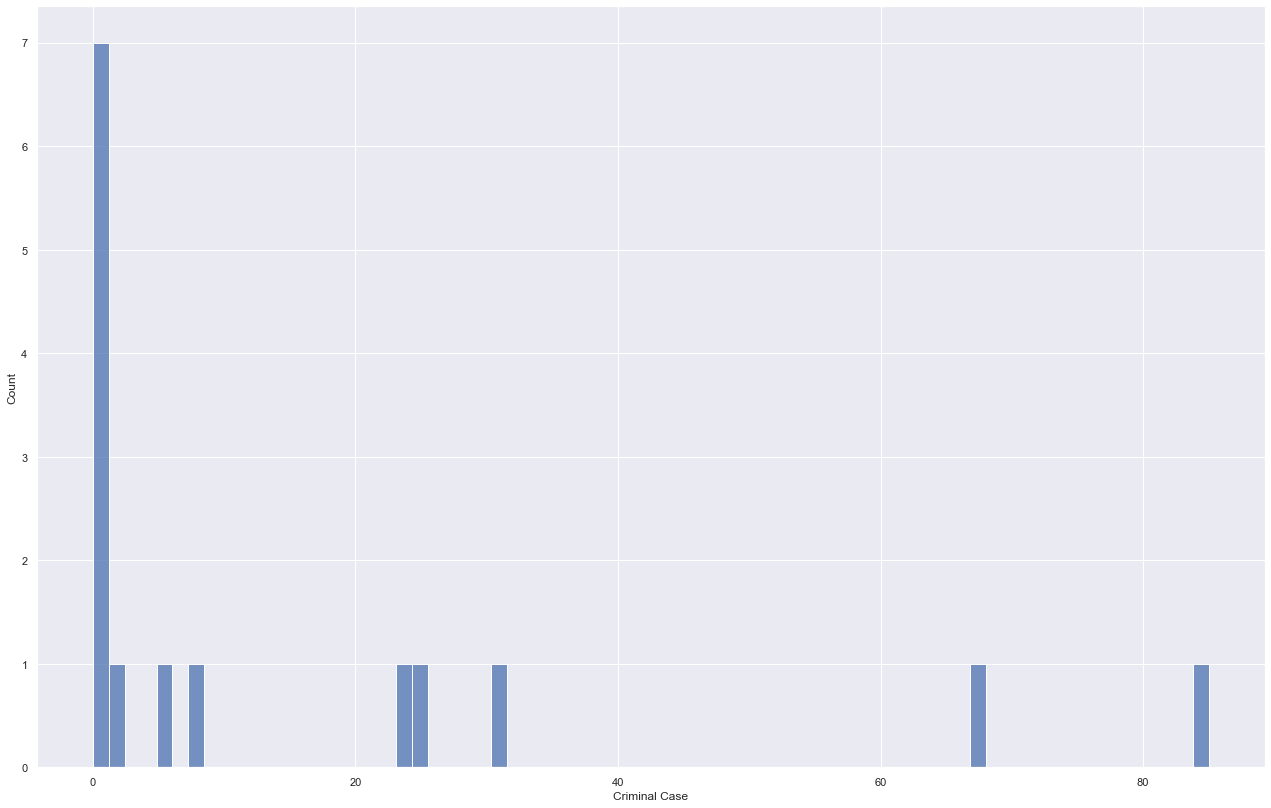

In [18]:
grps = df.groupby(['Party']).sum()
sns.histplot(data = grps, x = grps.get('Criminal Case'),bins = 70)

### What insights we can draw---
1. Majority of the parties do not have criminal cases filed against their candidates. The number is around 7, precisely 6 as we can count the same xthrough above groupby function output.
2. There is only one party having crosses the mark of greater than 80 criminal cases in total, precisely 85 and the party is INC - INDIAN NATIONAL CONGRESS
3. The least cases is against Himachal Jan Kranti Party.

<AxesSubplot:xlabel='Total Assets', ylabel='Count'>

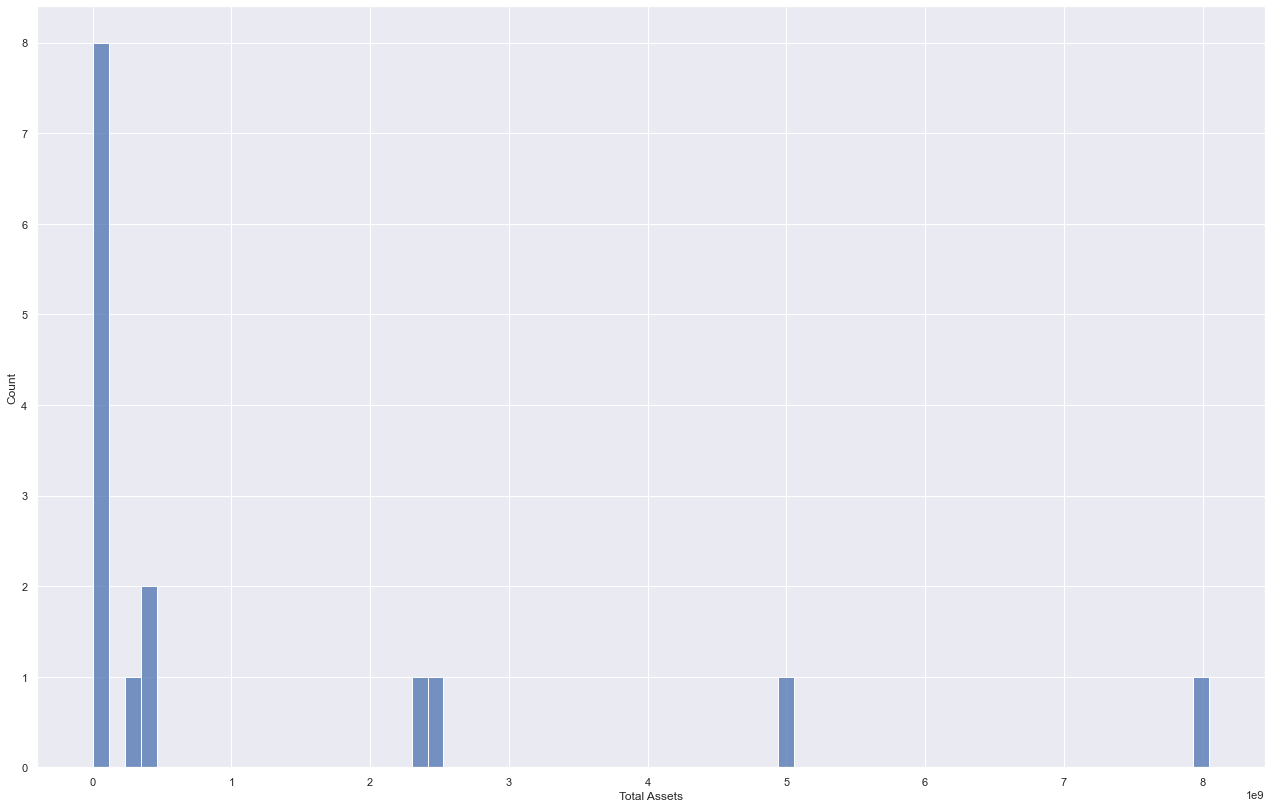

In [19]:
sns.histplot(data = grps, x = grps.get('Total Assets'),bins = 70)

# What insights we can draw---
The value of Total Assets owned by different parties in billions. And the Award goes to INC - INDIAN NATIONAL CONGRESS.

### b. Distplot
It is going to get drooped in coming versions of Seaborn, and hence we are skipping this.

### c. Boxplot

<AxesSubplot:>

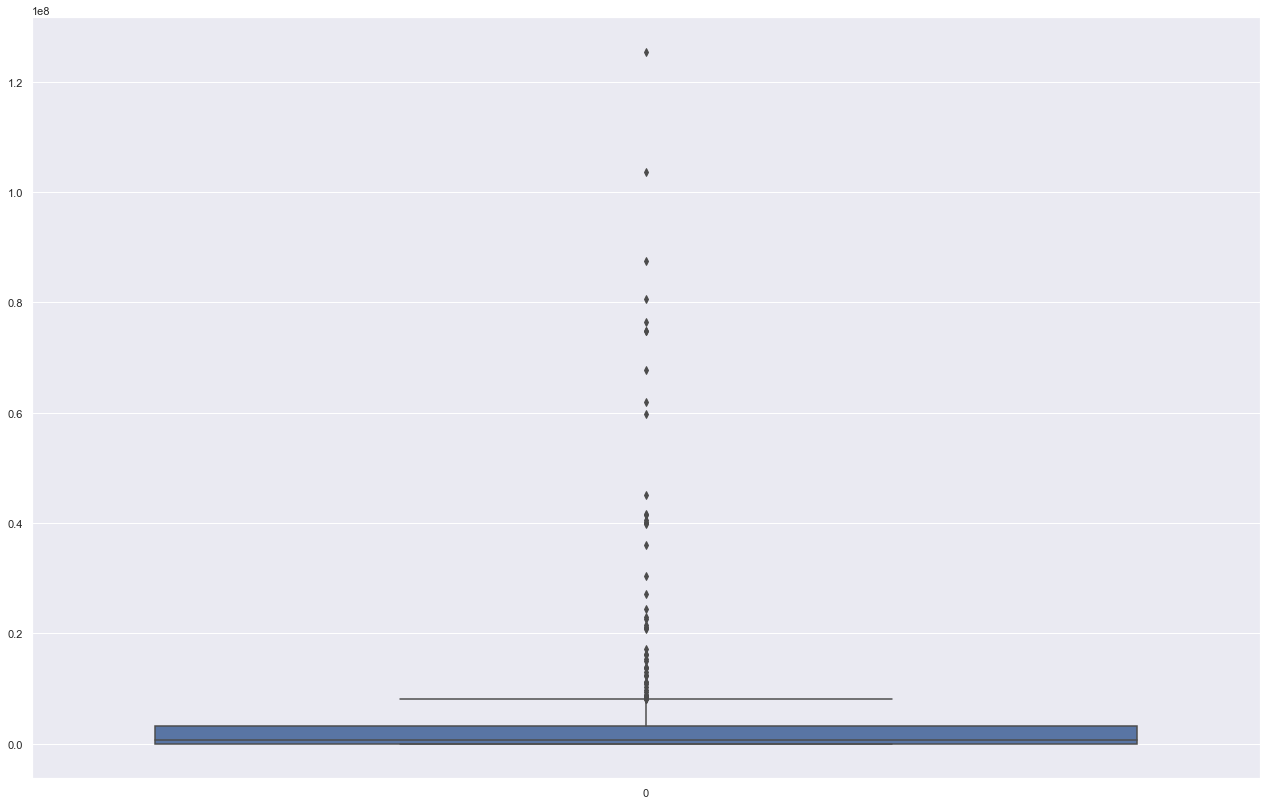

In [20]:
sns.boxplot(df['Liabilities'])

## Some other methods/functions to analyse the Numerical data:

In [21]:
grps.get('Total Assets').max()

8044365114.0

In [22]:
grps.get('Liabilities').max()

912624177.0

In [23]:
grps.get('Criminal Case').max()

85